# Iris dataset - Clustering and verifying

## Importing Libraries

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [88]:
import sklearn
from sklearn.datasets import load_iris

## About Data

In [89]:
iris_data = load_iris()
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [90]:
dataset = pd.DataFrame(iris_data.data,columns = iris_data.feature_names)

## Basic Exploratory analysis

In [91]:
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [92]:
dataset.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [93]:
dataset.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

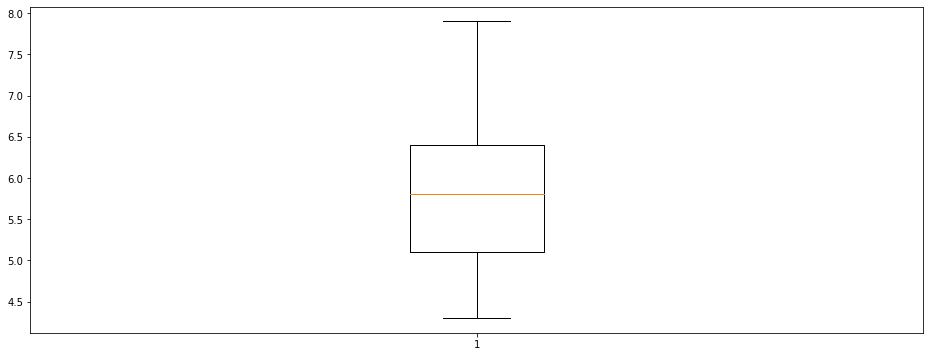

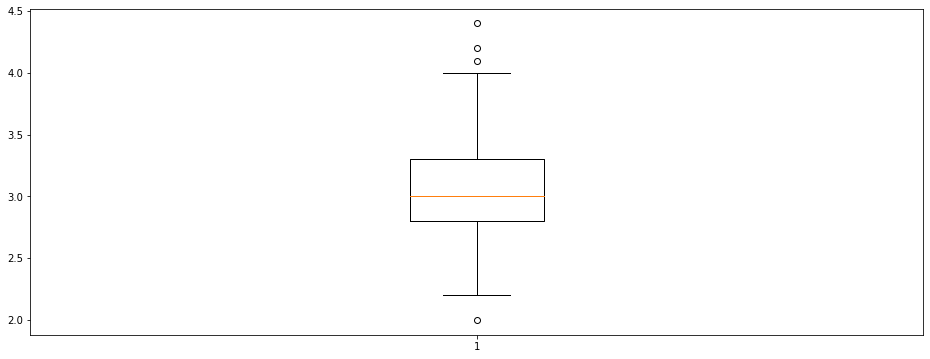

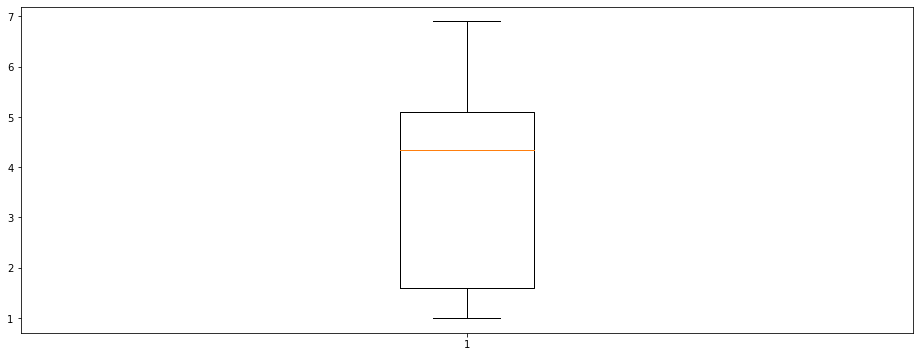

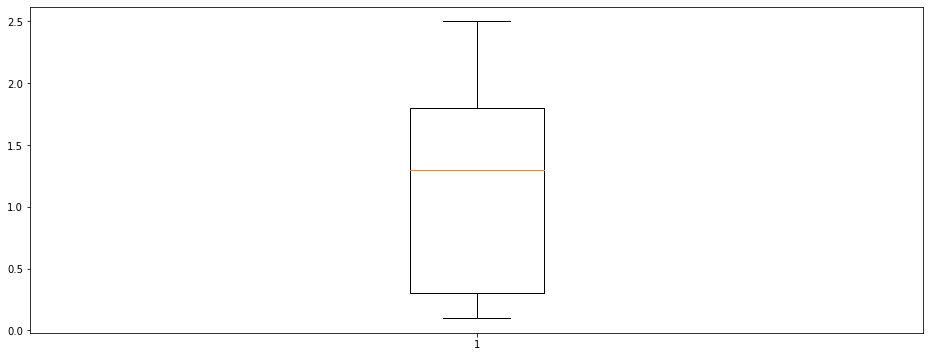

In [94]:
for i in dataset.columns:
    plt.figure(figsize = (16,6))
    plt.boxplot(dataset[i])
    plt.show()

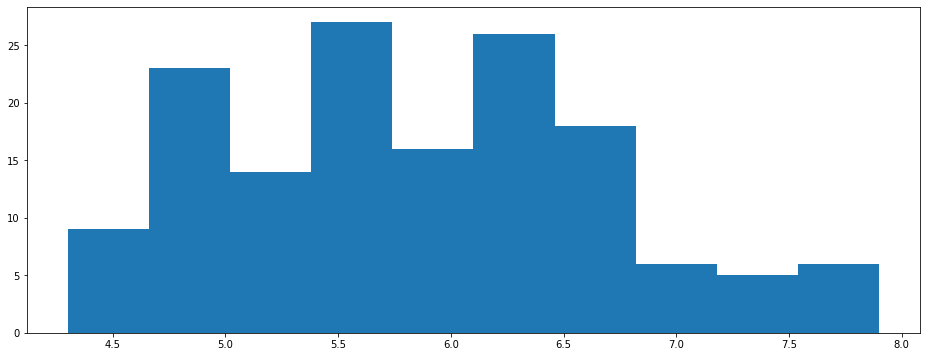

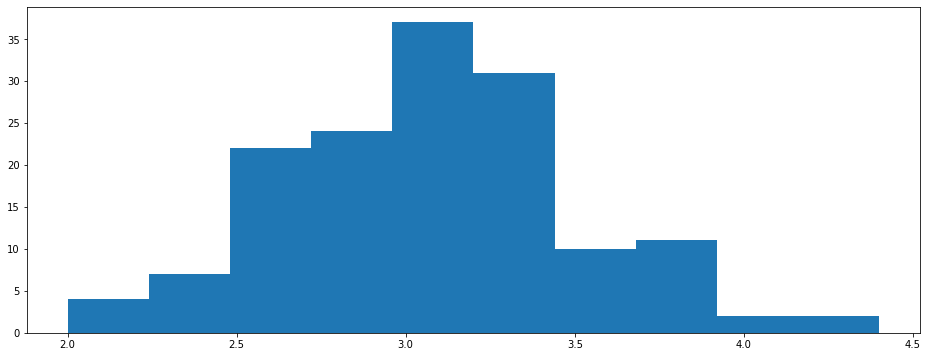

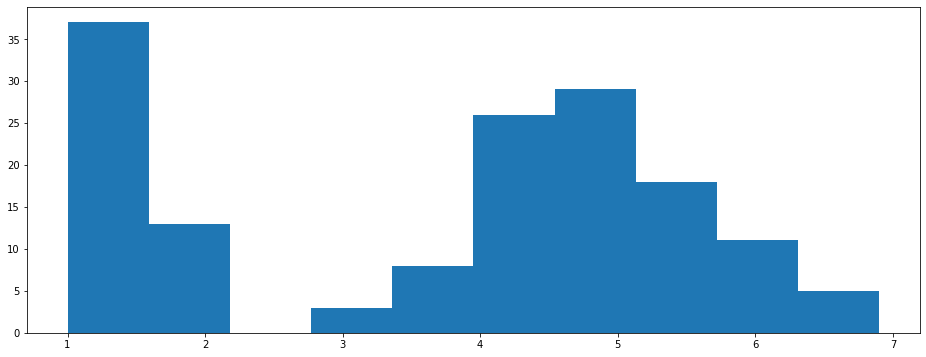

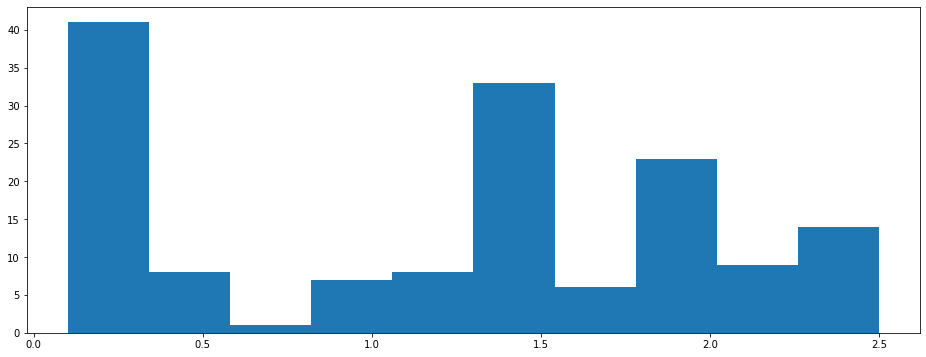

In [95]:
for i in dataset.columns:
    plt.figure(figsize = (16,6))
    plt.hist(dataset[i])
    plt.show()

<Figure size 1152x432 with 0 Axes>

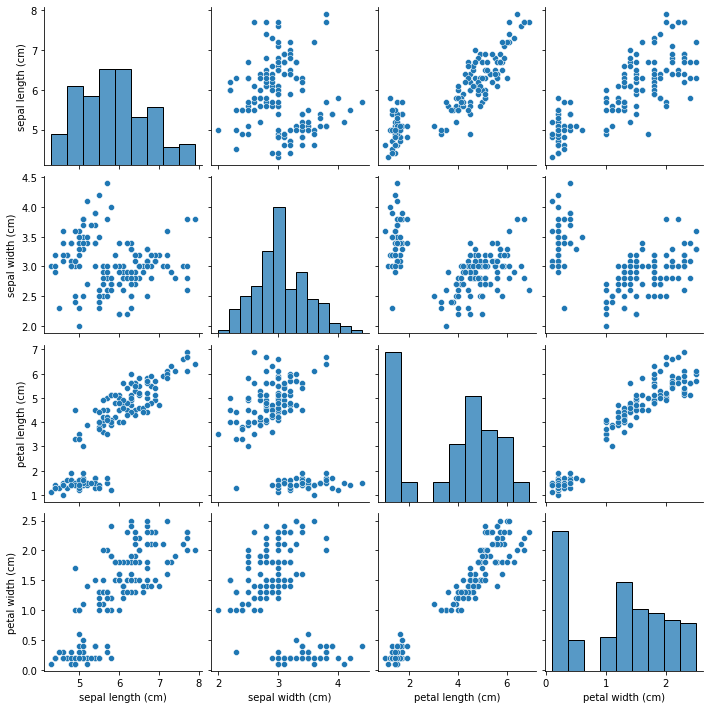

In [96]:
plt.figure(figsize = (16,6))
sns.pairplot(dataset)
plt.show()

### From above can clearly distinguish 2 clusters - minimum

In [97]:
from sklearn.metrics.cluster import entropy
for i in dataset.columns:
    print(i,entropy(dataset[i]))

sepal length (cm) 3.3423682425704624
sepal width (cm) 2.7886565850017027
petal length (cm) 3.489697968721065
petal width (cm) 2.807126229460098


entropy > 0.8,  so,good

In [98]:
from sklearn.cluster import KMeans
kmeans_1 = KMeans(n_clusters = 2)
labels_1 = kmeans_1.fit(dataset)

In [99]:
labels_1.inertia_ #152.34

152.34795176035797

In [100]:
kmeans_2 = KMeans(n_clusters = 3)
labels_2 = kmeans_2.fit(dataset)

In [101]:
labels_2.inertia_  #78.85

78.851441426146

In [102]:
kmeans_3 = KMeans(n_clusters = 4)
labels_3 = kmeans_3.fit(dataset)

In [103]:
labels_3.inertia_ #57.22

57.22847321428572

## Elbow Method

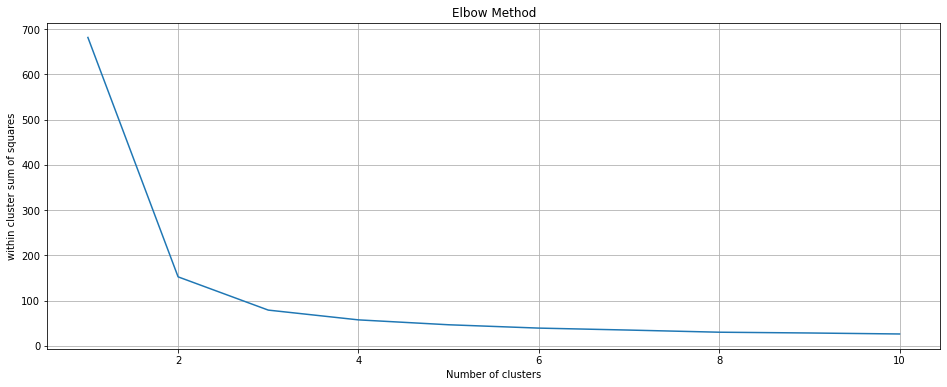

In [104]:
array_of_inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,random_state = 1)
    kmeans.fit(dataset)
    array_of_inertias.append(kmeans.inertia_)
    
x = range(1,11)
y = array_of_inertias
plt.figure(figsize = (16,6))
plt.plot(x,y)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("within cluster sum of squares")
plt.grid(visible = True)
plt.show()

#### So n_clusters = 3

In [110]:
kmeans = KMeans(n_clusters = 3)
target_predicted = kmeans.fit_predict(dataset)

In [111]:
np.unique(target_predicted,return_counts = True) #predicted

(array([0, 1, 2]), array([62, 50, 38], dtype=int64))

In [112]:
np.unique(iris_data.target,return_counts = True)

(array([0, 1, 2]), array([50, 50, 50], dtype=int64))

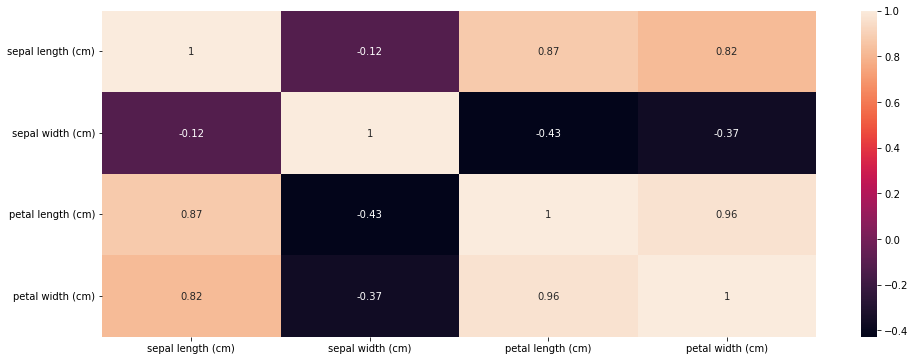

In [119]:
plt.figure(figsize = (16,6))
sns.heatmap(dataset.corr(),annot = True)
plt.show()

## Removing Multicollinearity

In [113]:
dataset_2 = dataset.drop("petal width (cm)",axis = 1)

In [114]:
kmeans = KMeans(n_clusters = 3)
target_predicted_2 = kmeans.fit_predict(dataset_2)

In [115]:
np.unique(target_predicted_2,return_counts = True)

(array([0, 1, 2]), array([58, 50, 42], dtype=int64))

In [116]:
np.unique(iris_data.target,return_counts = True)

(array([0, 1, 2]), array([50, 50, 50], dtype=int64))

### Conclusion, the iris data is clutered and the classes of flowers divided in a good numbers